#  Factors Influencing ACT Scores

#  Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.pipeline  import make_pipeline
import folium 
from folium.plugins import MarkerCluster

In [2]:
# Setting options to display all column and row names
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [3]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

In [4]:
data = pd.read_csv('ml_data.csv')

In [5]:
data.columns

Index(['Year', 'CDS_CODE', 'COUNTY', 'DISTRICT', 'SCHOOL', 'Charter',
       'Latitude', 'Longitude', 'Enroll12', 'NumTstTakr', 'AvgScrEng',
       'AvgScrRead', 'AvgScrMath', 'AvgScrSci', 'NumGE21', 'PctGE21',
       '(%)FRPM', 'American Indian or Alaska Native', 'Asian',
       'Pacific Islander', 'Filipino', 'Hispanic or Latino',
       'African American', 'White', 'Two or More Races', 'AvgScr'],
      dtype='object')

In [6]:
data.head()

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,American Indian or Alaska Native,Asian,Pacific Islander,Filipino,Hispanic or Latino,African American,White,Two or More Races,AvgScr
0,2014,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,Y,37.804520,-122.26815,48.0,18.0,16.0,15.0,17.0,16.0,1.0,5.56,77.259475,0.041667,0.000000,0.000000,0.000000,0.395833,0.541667,0.000000,0.020833,16.0
1,2014,1100170118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,Y,37.868991,-122.27844,51.0,25.0,18.0,17.0,19.0,18.0,7.0,28.00,66.086957,0.000000,0.019608,0.000000,0.039216,0.705882,0.235294,0.000000,0.000000,18.0
2,2014,1316170131763,Alameda,California School for the Deaf-Fremont (State ...,California School for the Deaf-Fremont,N,37.558956,-121.96551,76.0,23.0,14.0,15.0,15.0,14.0,1.0,4.35,99.752475,0.000000,0.105263,0.013158,0.039474,0.460526,0.144737,0.223684,0.013158,14.5
3,2014,1611190106401,Alameda,Alameda Unified,Alameda Science and Technology Institute,N,37.780753,-122.27930,41.0,20.0,26.0,26.0,27.0,25.0,17.0,85.00,23.529412,0.000000,0.487805,0.000000,0.000000,0.195122,0.097561,0.219512,0.000000,26.0
4,2014,1611190130229,Alameda,Alameda Unified,Alameda High,N,37.764958,-122.24593,428.0,114.0,25.0,24.0,25.0,24.0,94.0,82.46,22.831561,0.000000,0.469626,0.007009,0.088785,0.105140,0.044393,0.280374,0.004673,24.5


# Number of Clusters

In [7]:
def best_clusters(data):
    X = np.matrix(data.values)

    ks = range(2, 11)
    inertias = []

    for k in ks:
        # Create a KMeans instance with k clusters: model
        model = KMeans(n_clusters=k)

        # Fit model to samples
        model.fit(X)

        # Append the inertia to the list of inertias
        inertias.append(model.inertia_)
        
    # Plot ks vs inertias
    fig = plt.figure(figsize=(10,7))
    plt.plot(ks, inertias, '-o')
    plt.title('Number of clusters vs SSE')
    plt.xlabel('Number of clusters, k')
    plt.ylabel('Sum of squared distance')
    plt.xticks(ks)
    plt.show()

# Creating a Pipeline

In [8]:
def pipeline(k, data):
    X = np.matrix(data.values)
    kmeans = KMeans(n_clusters = k)
    pipeline =  make_pipeline(kmeans)
    labels = pipeline.fit_predict(X)
    data['cluster'] = labels

## Elbow Method

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow.<br>
The graph below shows that k= 3 or 4 might not be a bad choice. It’s still hard to figure out a good number of clusters to use because the curve is monotonically decreasing and not showing a good elbow point or has an obvious point where the curve starts flattening out. 

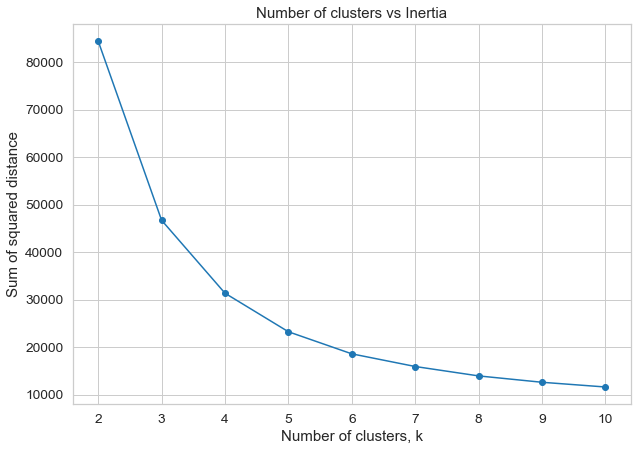

In [9]:
df = data[['AvgScrEng','AvgScrRead', 'AvgScrMath', 'AvgScrSci']]
# calling the best_clusters function 
best_clusters(df)

## Silhouette Analysis

Another method to find the number of clusters is Silhouette anlysis. Silhouette analysis can be used to determine the degree of separation between clusters. We want the silhouette coefficients to be as big as possible and close to 1 to have good clusters. <br>
In the elbow method, the number of clusters we picked was 3 or 4. Here, I am applying the Silhouette method to pick the best k among 3,4 and 5. Looking at the silhoutte coefficients and the graphs below, the best pick for k would be 3. When k=3, Silhouette coefficient is 0.48 which is the highest among the other scores.

Silhouette coefficient for k = 3 is 0.48410185397926714
Silhouette coefficient for k = 4 is 0.44570787291610436
Silhouette coefficient for k = 5 is 0.42669153420237527


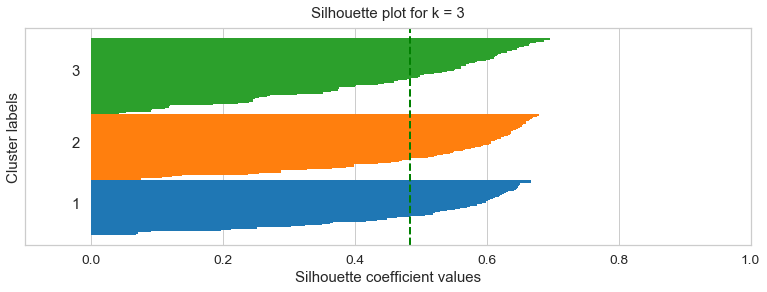

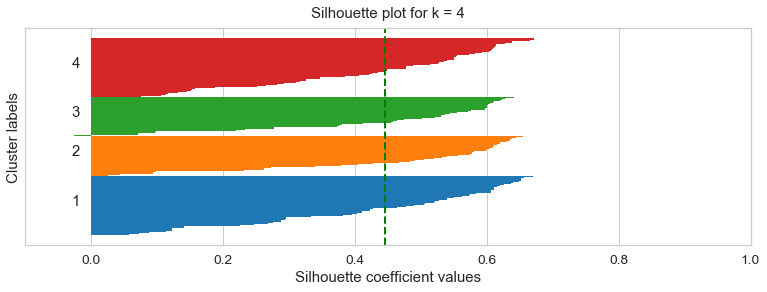

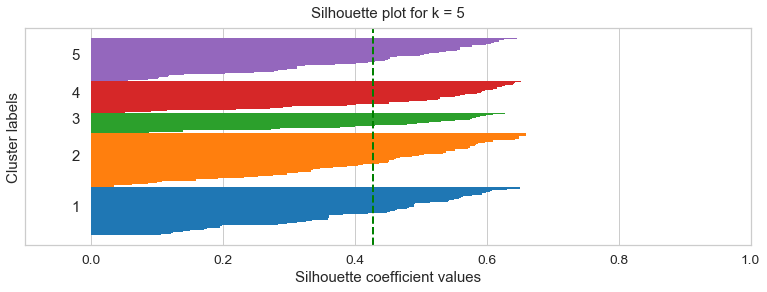

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([3, 4, 5]):

    fig = plt.figure(figsize=(13,4))
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(df)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(df, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        plt.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    plt.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    plt.yticks([])
    plt.xlim([-0.1, 1])
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster labels')
    plt.title(f'Silhouette plot for k = {k}', y=1.02)
    print('Silhouette coefficient for k = {} is {}'. format(k, avg_score))

In [11]:
# calling the pipeline function 
pipeline(3, df)

/Users/meralbalik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
# calculating the cluster  centers for each subject test
centroids = model.cluster_centers_
centroids_e = centroids[:,0]
centroids_r = centroids[:,1]
centroids_m = centroids[:,2]
centroids_s = centroids[:,3]
centroids

array([[16.40833333, 17.66111111, 18.09222222, 17.55388889],
       [20.8862421 , 21.85172581, 21.57413709, 21.13125912],
       [25.54099462, 25.80040323, 25.56586022, 24.73790323]])

In the above cell, I've summarized the cluster centers. The first column represent the cluster centers for average English scores for each cluster. The second column is for Reading scores, third and fourth column is for Math and Science scores respectively. For example, for English scores, the centroid of the class 1 is 16.40, the centroid of the class 0 is 20.88 and finally the centroid of the class 2 is 25.54. <br>
<b>Class 0</b> (shown in blue color) represents the schools with <b>medium</b> success level,<br> <b>Class 1</b> (shown in orange color) represents the schools with <b>low</b> success level,<br> <b>Class 2</b> (shown in green color) represents the schools with <b>high</b> success level.

In [78]:
# adding a clomun to the original data showing the clusters
data['cluster'] = df['cluster']
data.head()

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,American Indian or Alaska Native,Asian,Pacific Islander,Filipino,Hispanic or Latino,African American,White,Two or More Races,AvgScr,cluster
0,2014,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,Y,37.804520,-122.26815,48.0,18.0,16.0,15.0,17.0,16.0,1.0,5.56,77.259475,0.041667,0.000000,0.000000,0.000000,0.395833,0.541667,0.000000,0.020833,16.0,1
1,2014,1100170118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,Y,37.868991,-122.27844,51.0,25.0,18.0,17.0,19.0,18.0,7.0,28.00,66.086957,0.000000,0.019608,0.000000,0.039216,0.705882,0.235294,0.000000,0.000000,18.0,1
2,2014,1316170131763,Alameda,California School for the Deaf-Fremont (State ...,California School for the Deaf-Fremont,N,37.558956,-121.96551,76.0,23.0,14.0,15.0,15.0,14.0,1.0,4.35,99.752475,0.000000,0.105263,0.013158,0.039474,0.460526,0.144737,0.223684,0.013158,14.5,1
3,2014,1611190106401,Alameda,Alameda Unified,Alameda Science and Technology Institute,N,37.780753,-122.27930,41.0,20.0,26.0,26.0,27.0,25.0,17.0,85.00,23.529412,0.000000,0.487805,0.000000,0.000000,0.195122,0.097561,0.219512,0.000000,26.0,2
4,2014,1611190130229,Alameda,Alameda Unified,Alameda High,N,37.764958,-122.24593,428.0,114.0,25.0,24.0,25.0,24.0,94.0,82.46,22.831561,0.000000,0.469626,0.007009,0.088785,0.105140,0.044393,0.280374,0.004673,24.5,2


# Visualization of Clusters

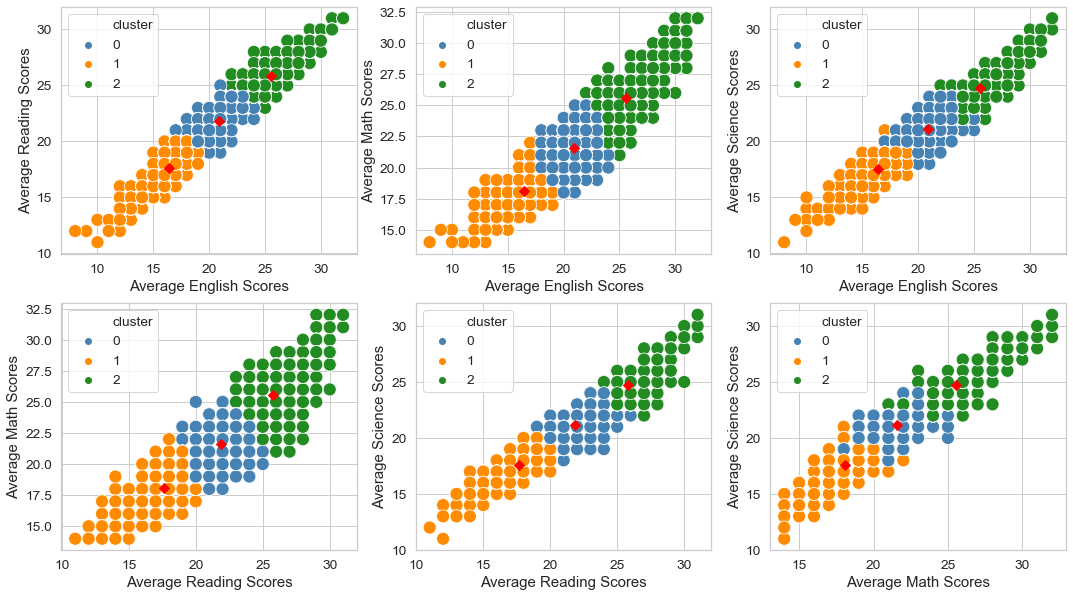

In [47]:
fig = plt.figure(figsize=(18, 10))

color_dict = dict({0:'steelblue',1:'darkorange',2: 'forestgreen'})

plt.subplot(2, 3, 1)
sns.scatterplot(x=df['AvgScrEng'], y=df['AvgScrRead'], hue=data['cluster'], s=170, palette=color_dict)
plt.scatter(centroids_e, centroids_r, marker= 'D',s=50, color='red')
plt.xlabel('Average English Scores')
plt.ylabel('Average Reading Scores')

plt.subplot(2, 3, 2)
sns.scatterplot(x=df['AvgScrEng'], y=df['AvgScrMath'], hue=data['cluster'], s=170, palette=color_dict)
plt.scatter(centroids_e, centroids_m, marker= 'D',s=50, color='red')
plt.xlabel('Average English Scores')
plt.ylabel('Average Math Scores')

plt.subplot(2, 3, 3)
sns.scatterplot(x=df['AvgScrEng'], y=df['AvgScrSci'], hue=data['cluster'], s=170, palette=color_dict)
plt.scatter(centroids_e, centroids_s, marker= 'D',s=50, color='red')
plt.xlabel('Average English Scores')
plt.ylabel('Average Science Scores')

plt.subplot(2, 3, 4)
sns.scatterplot(x=df['AvgScrRead'], y=df['AvgScrMath'], hue=data['cluster'], s=170, palette=color_dict)
plt.scatter(centroids_r, centroids_m, marker= 'D',s=50, color='red')
plt.xlabel('Average Reading Scores')
plt.ylabel('Average Math Scores')

plt.subplot(2, 3, 5)
sns.scatterplot(x=df['AvgScrRead'], y=df['AvgScrSci'], hue=data['cluster'], s=170, palette=color_dict)
plt.scatter(centroids_r, centroids_s, marker= 'D',s=50, color='red')
plt.xlabel('Average Reading Scores')
plt.ylabel('Average Science Scores')

plt.subplot(2, 3, 6)
sns.scatterplot(x=df['AvgScrMath'], y=df['AvgScrSci'], hue=data['cluster'], s=170, palette=color_dict)
plt.scatter(centroids_m, centroids_s, marker= 'D',s=50, color='red')
plt.xlabel('Average Math Scores')
plt.ylabel('Average Science Scores')

plt.show()


In [79]:
# Grouping the schools based on their cluster number
sch0 = data[df['cluster'] == 0][['SCHOOL', 'Latitude', 'Longitude']]

sch1 = data[df['cluster'] == 1][['SCHOOL', 'Latitude', 'Longitude']]

sch2 = data[df['cluster'] == 2][['SCHOOL', 'Latitude', 'Longitude']]

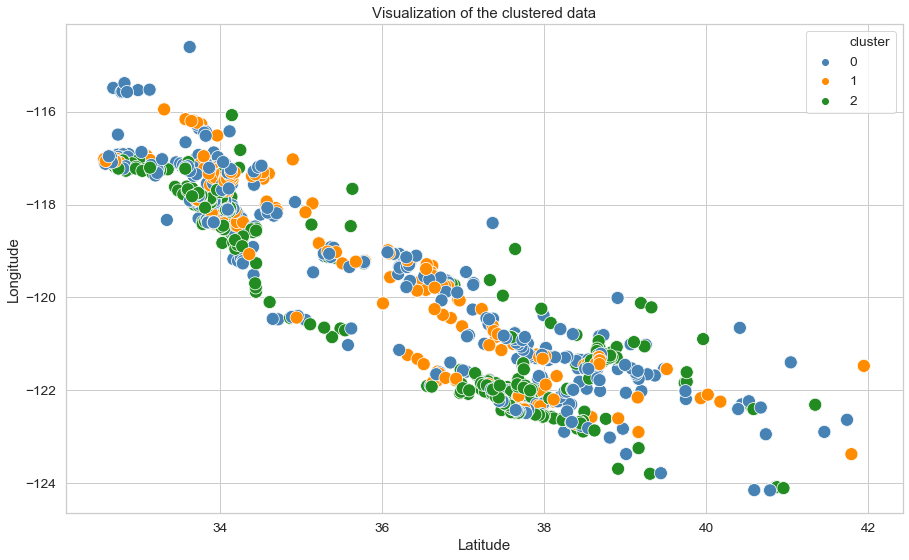

In [80]:
fig = plt.figure(figsize=(15,9))
plt.title("Visualization of the clustered data")
sns.scatterplot(x=data['Latitude'], y=data['Longitude'], hue=data['cluster'], s=170, palette=color_dict)
plt.show()

In the graph above, we can see the distribution of the schools based on their clusters. It is hard to find a specific pattern looking at the schools's locations. So in the next section, I am creating horizantal bar graphs that show the the number of  schools in each county grouped by their clusters. The number of schools with low success level is shown in orange.  

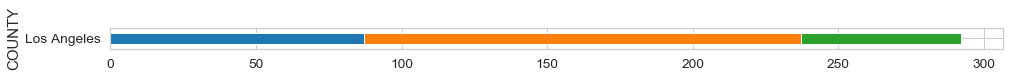

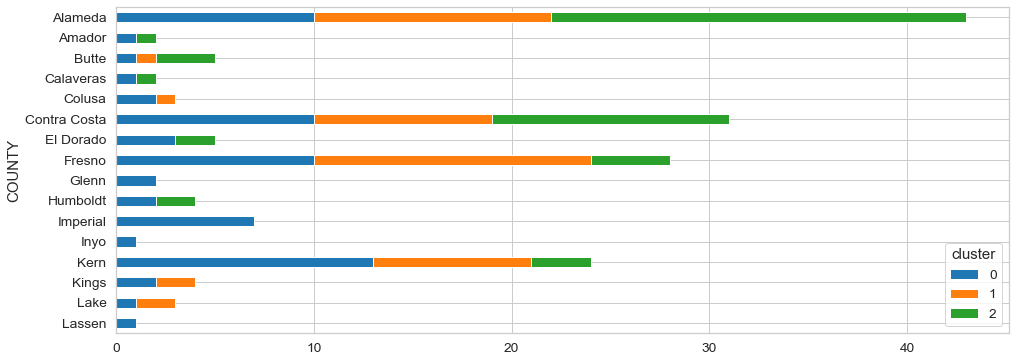

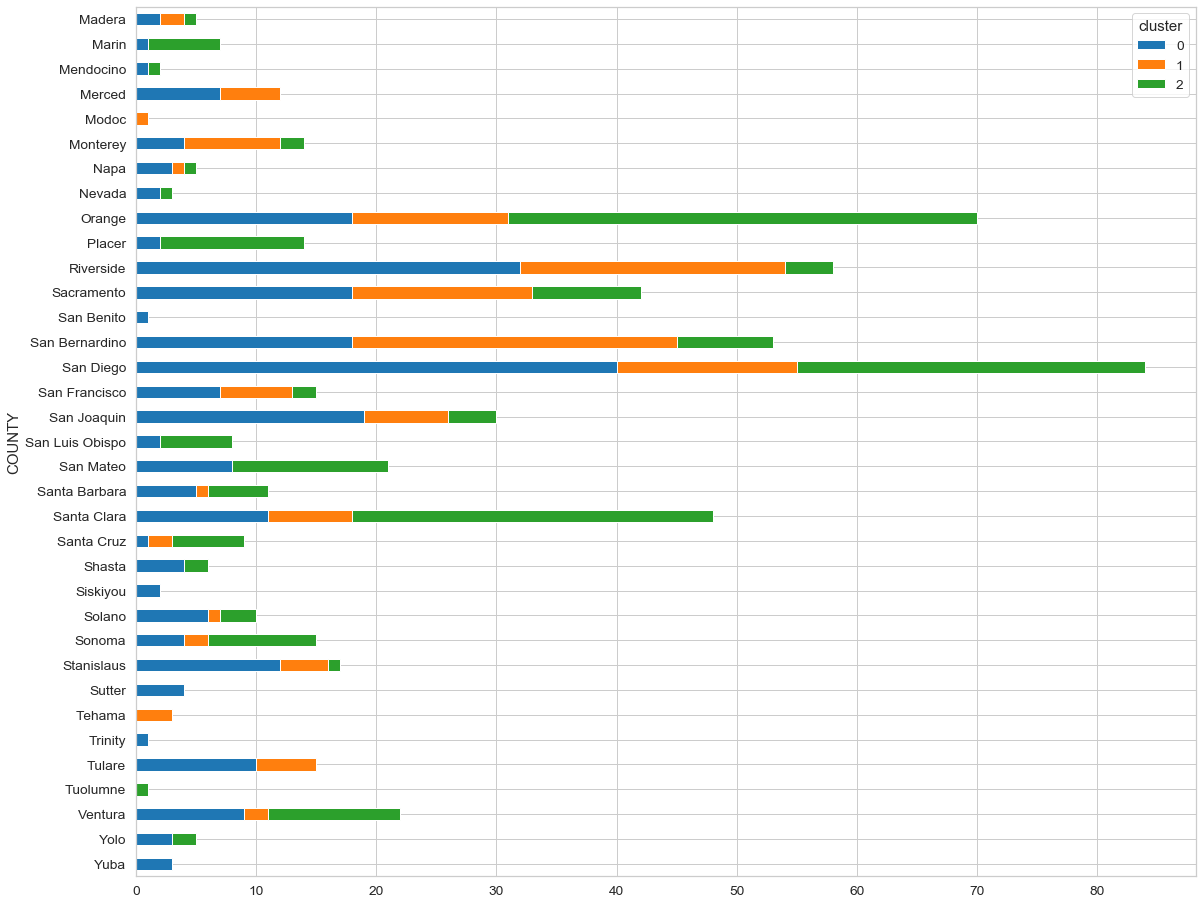

In [70]:
sch_cls = data[data['Year']==2018]
sch_cls = sch_cls.groupby(['COUNTY', 'cluster']).size().unstack()
sch_cls[sch_cls.index=='Los Angeles'].plot(kind='barh', stacked=True, figsize=(16,0.4))
plt.legend().remove()
plt.gca().invert_yaxis()
sch_cls[:16].plot(kind='barh', stacked=True, figsize=(16,6))
plt.gca().invert_yaxis()
sch_cls[17:].plot(kind='barh', stacked=True, figsize=(19,16))
plt.gca().invert_yaxis()

In the above graph, there are some counties which have high percentage of orange color meaning that they contain more schools with low success. Below, I pull up some of those counties to take a closer look. 

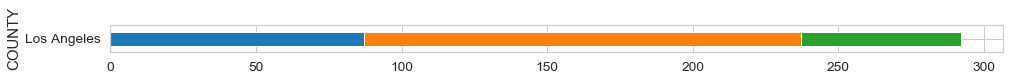

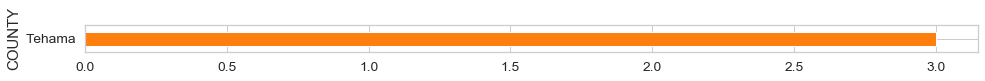

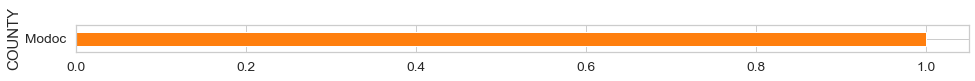

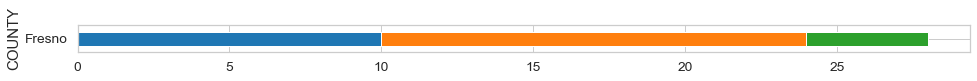

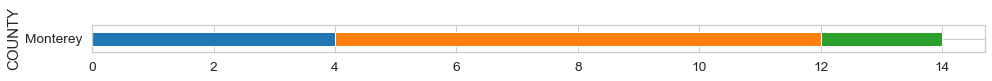

In [77]:
sch_cls[sch_cls.index=='Los Angeles'].plot(kind='barh', stacked=True, figsize=(16,0.5))
plt.legend().remove()
sch_cls[sch_cls.index=='Tehama'].plot(kind='barh', stacked=True, figsize=(16,0.5))
plt.legend().remove()
sch_cls[sch_cls.index=='Modoc'].plot(kind='barh', stacked=True, figsize=(16,0.5))
plt.legend().remove()
sch_cls[sch_cls.index=='Fresno'].plot(kind='barh', stacked=True, figsize=(16,0.5))
plt.legend().remove()
sch_cls[sch_cls.index=='Monterey'].plot(kind='barh', stacked=True, figsize=(16,0.5))
plt.legend().remove()

One of the counties with high percentage of schools with low success level is Los Angeles. In Tehama, three of the schools are again in the low success level group. 

In [20]:
data[data['COUNTY']=='Tehama']

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,American Indian or Alaska Native,Asian,Pacific Islander,Filipino,Hispanic or Latino,African American,White,Two or More Races,AvgScr,cluster
1028,2014,52715065231709,Tehama,Corning Union High,Corning High,N,39.935147,-122.17251,222.0,55.0,19.0,20.0,19.0,19.0,20.0,36.36,75.055188,0.013514,0.004505,0.000000,0.000000,0.495495,0.000000,0.463964,0.009009,19.25,1
1029,2014,52715715235106,Tehama,Los Molinos Unified,Los Molinos High,N,40.021194,-122.09626,47.0,21.0,17.0,19.0,19.0,19.0,6.0,28.57,76.165803,0.000000,0.000000,0.000000,0.000000,0.446809,0.000000,0.510638,0.042553,18.50,1
1030,2014,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,325.0,70.0,23.0,25.0,24.0,23.0,48.0,68.57,56.559140,0.033846,0.006154,0.000000,0.003077,0.240000,0.018462,0.673846,0.024615,23.75,2
2068,2015,52715065231709,Tehama,Corning Union High,Corning High,N,39.935147,-122.17251,230.0,74.0,19.0,20.0,20.0,20.0,30.0,40.54,73.140954,0.017391,0.008696,0.000000,0.004348,0.473913,0.017391,0.460870,0.004348,19.75,0
2069,2015,52715715235106,Tehama,Los Molinos Unified,Los Molinos High,N,40.021194,-122.09626,37.0,41.0,17.0,19.0,20.0,18.0,10.0,24.39,78.089888,0.000000,0.000000,0.000000,0.000000,0.621622,0.000000,0.378378,0.000000,18.50,1
2070,2015,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,334.0,235.0,18.0,19.0,20.0,19.0,90.0,38.30,58.671096,0.020958,0.005988,0.002994,0.005988,0.260479,0.008982,0.664671,0.026946,19.00,1
3152,2016,52715065231709,Tehama,Corning Union High,Corning High,N,39.935147,-122.17251,189.0,103.0,17.0,19.0,19.0,19.0,32.0,31.07,69.266055,0.005291,0.005291,0.010582,0.000000,0.544974,0.000000,0.433862,0.000000,18.50,1
3153,2016,52715715235106,Tehama,Los Molinos Unified,Los Molinos High,N,40.021194,-122.09626,39.0,40.0,15.0,16.0,17.0,16.0,4.0,10.00,68.208092,0.000000,0.000000,0.025641,0.000000,0.512821,0.025641,0.410256,0.025641,16.00,1
3154,2016,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,331.0,219.0,18.0,19.0,19.0,19.0,80.0,36.53,56.237357,0.036254,0.003021,0.000000,0.000000,0.247734,0.012085,0.649547,0.051360,18.75,1
4218,2017,52715065231709,Tehama,Corning Union High,Corning High,N,39.935147,-122.17251,190.0,84.0,17.0,18.0,17.0,17.0,19.0,22.62,69.281768,0.000000,0.000000,0.000000,0.005263,0.510526,0.010526,0.442105,0.010526,17.25,1


In [22]:
data[data['SCHOOL']=='Red Bluff High']

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,American Indian or Alaska Native,Asian,Pacific Islander,Filipino,Hispanic or Latino,African American,White,Two or More Races,AvgScr,cluster
1030,2014,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,325.0,70.0,23.0,25.0,24.0,23.0,48.0,68.57,56.559140,0.033846,0.006154,0.000000,0.003077,0.240000,0.018462,0.673846,0.024615,23.75,2
2070,2015,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,334.0,235.0,18.0,19.0,20.0,19.0,90.0,38.30,58.671096,0.020958,0.005988,0.002994,0.005988,0.260479,0.008982,0.664671,0.026946,19.00,1
3154,2016,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,331.0,219.0,18.0,19.0,19.0,19.0,80.0,36.53,56.237357,0.036254,0.003021,0.000000,0.000000,0.247734,0.012085,0.649547,0.051360,18.75,1
4220,2017,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,369.0,257.0,18.0,19.0,19.0,19.0,89.0,34.63,57.825802,0.032520,0.005420,0.000000,0.000000,0.262873,0.013550,0.644986,0.040650,18.75,1
5297,2018,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,345.0,265.0,17.0,18.0,18.0,18.0,74.0,27.92,58.463542,0.028986,0.008696,0.000000,0.011594,0.295652,0.008696,0.620290,0.026087,17.75,1


In [23]:
data[data['COUNTY']=='Modoc']

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,American Indian or Alaska Native,Asian,Pacific Islander,Filipino,Hispanic or Latino,African American,White,Two or More Races,AvgScr,cluster
491,2014,25735934737250,Modoc,Tulelake Basin Joint Unified,Tulelake High,N,41.948868,-121.47648,40.0,18.0,19.0,20.0,20.0,20.0,7.0,38.89,76.712329,0.0,0.0,0.0,0.0,0.475000,0.0,0.425000,0.050000,19.75,0
2608,2016,25735934737250,Modoc,Tulelake Basin Joint Unified,Tulelake High,N,41.948868,-121.47648,35.0,17.0,19.0,20.0,19.0,19.0,7.0,41.18,72.850679,0.0,0.0,0.0,0.0,0.657143,0.0,0.342857,0.000000,19.25,1
3683,2017,25735934737250,Modoc,Tulelake Basin Joint Unified,Tulelake High,N,41.948868,-121.47648,35.0,18.0,18.0,21.0,18.0,19.0,5.0,27.78,65.853659,0.0,0.0,0.0,0.0,0.714286,0.0,0.285714,0.000000,19.00,1
4754,2018,25735934737250,Modoc,Tulelake Basin Joint Unified,Tulelake High,N,41.948868,-121.47648,30.0,23.0,16.0,18.0,17.0,19.0,4.0,17.39,65.555556,0.0,0.0,0.0,0.0,0.666667,0.0,0.300000,0.033333,17.50,1
